In [204]:
# import libraries 

import pandas as pd  
import numpy as np 

from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib.gridspec as gridspec
import seaborn as sns 
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# for data preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# library for model creation 
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# model evaluation 
from sklearn.metrics import mean_squared_error, r2_score

# silent warnings 
import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis

In [205]:
# read the datasets
stu_mat = pd.read_csv('data/student-mat.csv', sep=';')
stu_por = pd.read_csv('data/student-por.csv', sep=';')

In [166]:
stu_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  ...  higher  internet romantic famrel freetime goout Dalc Walc health absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2  ...     yes        no       no      4        3     4    1    1      3        6   5   6   6
1     GP   F   17       U     GT3       T     1     1  at_home     other  course   father           1  ...     yes       yes       no      5        3     3    1    1      3        4   5   5   6
2     GP   F   15       U     LE3       T     1     1  at_home     other   other   mother           1  ...     yes       yes       no      4        3     2    2    3      3       10   7   8  10
3     GP   F   15       U     GT3       T     4     2   health  services    home   mother           1  ...     yes       yes      yes      3        2     2    1    1      5        2  15  14  15
4     GP   F   16       U     GT3       T     3     3    other     other    home   father           1  ...     yes        no       no      4        3     2    1    2      5        4   6  10  10

[5 rows x 33 columns]

In [167]:
stu_mat.shape    

(395, 33)

In [168]:
stu_por.head() 

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  ...  higher  internet romantic famrel freetime goout Dalc Walc health absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2  ...     yes        no       no      4        3     4    1    1      3        4   0  11  11
1     GP   F   17       U     GT3       T     1     1  at_home     other  course   father           1  ...     yes       yes       no      5        3     3    1    1      3        2   9  11  11
2     GP   F   15       U     LE3       T     1     1  at_home     other   other   mother           1  ...     yes       yes       no      4        3     2    2    3      3        6  12  13  12
3     GP   F   15       U     GT3       T     4     2   health  services    home   mother           1  ...     yes       yes      yes      3        2     2    1    1      5        0  14  14  14
4     GP   F   16       U     GT3       T     3     3    other     other    home   father           1  ...     yes        no       no      4        3     2    1    2      5        0  11  13  13

[5 rows x 33 columns]

In [169]:
stu_por.shape

(649, 33)

In [170]:
# concatenate both datasets 
comb_df = pd.concat([stu_mat, stu_por], axis=0)

In [171]:
comb_df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  reason guardian  traveltime  ...  higher  internet romantic famrel freetime goout Dalc Walc health absences  G1  G2  G3
0       GP   F   18       U     GT3       A     4     4   at_home   teacher  course   mother           2  ...     yes        no       no      4        3     4    1    1      3        6   5   6   6
1       GP   F   17       U     GT3       T     1     1   at_home     other  course   father           1  ...     yes       yes       no      5        3     3    1    1      3        4   5   5   6
2       GP   F   15       U     LE3       T     1     1   at_home     other   other   mother           1  ...     yes       yes       no      4        3     2    2    3      3       10   7   8  10
3       GP   F   15       U     GT3       T     4     2    health  services    home   mother           1  ...     yes       yes      yes      3        2     2    1    1      5        2  15  14  15
4       GP   F   16       U     GT3       T     3     3     other     other    home   father           1  ...     yes        no       no      4        3     2    1    2      5        4   6  10  10
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...     ...      ...         ...  ...     ...       ...      ...    ...      ...   ...  ...  ...    ...      ...  ..  ..  ..
644     MS   F   19       R     GT3       T     2     3  services     other  course   mother           1  ...     yes       yes       no      5        4     2    1    2      5        4  10  11  10
645     MS   F   18       U     LE3       T     3     1   teacher  services  course   mother           1  ...     yes       yes       no      4        3     4    1    1      1        4  15  15  16
646     MS   F   18       U     GT3       T     1     1     other     other  course   mother           2  ...     yes        no       no      1        1     1    1    1      5        6  11  12   9
647     MS   M   17       U     LE3       T     3     1  services  services  course   mother           2  ...     yes       yes       no      2        4     5    3    4      2        6  10  10  10
648     MS   M   18       R     LE3       T     3     2  services     other  course   mother           3  ...     yes       yes       no      4        4     1    3    4      5        4  10  11  11

[1044 rows x 33 columns]

In [172]:
comb_df.describe(include='all')

school   sex          age address famsize Pstatus         Medu         Fedu  ...        goout         Dalc         Walc       health     absences           G1           G2           G3
count    1044  1044  1044.000000    1044    1044    1044  1044.000000  1044.000000  ...  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000
unique      2     2          NaN       2       2       2          NaN          NaN  ...          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN
top        GP     F          NaN       U     GT3       T          NaN          NaN  ...          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN
freq      772   591          NaN     759     738     923          NaN          NaN  ...          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN
mean      NaN   NaN    16.726054     NaN     NaN     NaN     2.603448     2.387931  ...     3.156130     1.494253     2.284483     3.543103     4.434866    11.213602    11.246169    11.341954
std       NaN   NaN     1.239975     NaN     NaN     NaN     1.124907     1.099938  ...     1.152575     0.911714     1.285105     1.424703     6.210017     2.983394     3.285071     3.864796
min       NaN   NaN    15.000000     NaN     NaN     NaN     0.000000     0.000000  ...     1.000000     1.000000     1.000000     1.000000     0.000000     0.000000     0.000000     0.000000
25%       NaN   NaN    16.000000     NaN     NaN     NaN     2.000000     1.000000  ...     2.000000     1.000000     1.000000     3.000000     0.000000     9.000000     9.000000    10.000000
50%       NaN   NaN    17.000000     NaN     NaN     NaN     3.000000     2.000000  ...     3.000000     1.000000     2.000000     4.000000     2.000000    11.000000    11.000000    11.000000
75%       NaN   NaN    18.000000     NaN     NaN     NaN     4.000000     3.000000  ...     4.000000     2.000000     3.000000     5.000000     6.000000    13.000000    13.000000    14.000000
max       NaN   NaN    22.000000     NaN     NaN     NaN     4.000000     4.000000  ...     5.000000     5.000000     5.000000     5.000000    75.000000    19.000000    19.000000    20.000000

[11 rows x 33 columns]

### Description of the data 
- There are 1044 of data entries with only two distinct schools 
- The average age of a student is 17 years with 15 years minimum and 22 years maximum 


In [173]:
# percentage of female and male 
fmale = round(len(comb_df[comb_df['sex']=='F'])/len(comb_df), 2)
male = round(len(comb_df[comb_df["sex"]=="M"])/len(comb_df), 2)

In [174]:
print("Percentage fmale is {} and male is {}".format(round(fmale*100, 0), male*100))

Percentage fmale is 57.0 and male is 43.0


In [175]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [206]:
columns_object = [column for column in comb_df.columns if comb_df[column].dtypes=='object']
columns_num = [column for column in comb_df.columns if comb_df[column].dtypes in ['int64', 'float64']]

In [207]:
print("The total number of features are {} while {} is integer type and {} string type".format(comb_df.shape[1], len(columns_num), len(columns_object)))

The total number of features are 33 while 16 is integer type and 17 string type


In [208]:
# list of student attributes 

sim_attr = ['school', "sex", "age", "address", "famsize", "Pstatus", 
           "Medu", "Fedu", "Mjob", "Fjob","reason","nursery","internet"]

print('We have {} duplicate rows in the dataset'.format(comb_df[comb_df.duplicated(sim_attr,keep='first')].shape[0]))

# Lets drop the duplicates and maintain its first occurance
df = comb_df[~comb_df.duplicated(sim_attr, keep='first')]

#  The shape of the data after dropping duplicates 
df.shape

We have 382 duplicate rows in the dataset


(662, 33)

### Data Visualization 

In [209]:
# Visualization distribution of data 

# histogram chart 
def _plot_histogram(x, column, bins=10):
    x = x.dropna()
    xlabel = "{} bin tickers".format(column)
    ylabel = "Count obs in {} each bin".format(column)
    title = 'Histogram plot of {} with {} bins'.format(column, bins)
    ax = plt.hist(x, bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return ax

(array([112., 173., 178.,   0., 142.,  45.,   0.,   8.,   3.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <a list of 10 Patch objects>)

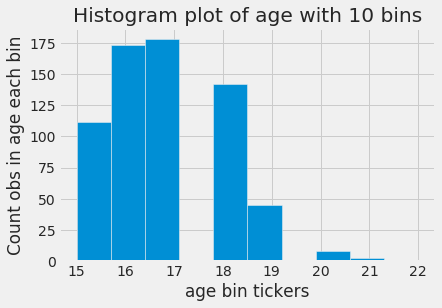

In [210]:
# test 
_plot_histogram(df["age"], "age", bins=10)

In [211]:
# barchart 

def _plot_barchart(x, column):
    xlabel = "Group of {}".format(column)
    ylabel = "Count osb in {} each bins".format(column)
    title = "Barchart plot of {}".format(column)
    x = x.fillna("Missing")
    df_x =  x.value_counts(dropna = False)
    x_index =  df_x.index
    x_value = df_x.values
    ax = sns.barplot(x_index, x_value, order=x_index)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for label, p in zip(x_value, ax.patches): 
        ax.annotate(label, (p.get_x()+ 0.25, p.get_height() + 0.75))
    return ax

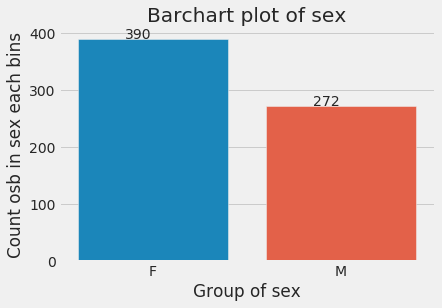

In [212]:
# test 
_plot_barchart(df["sex"], "sex")

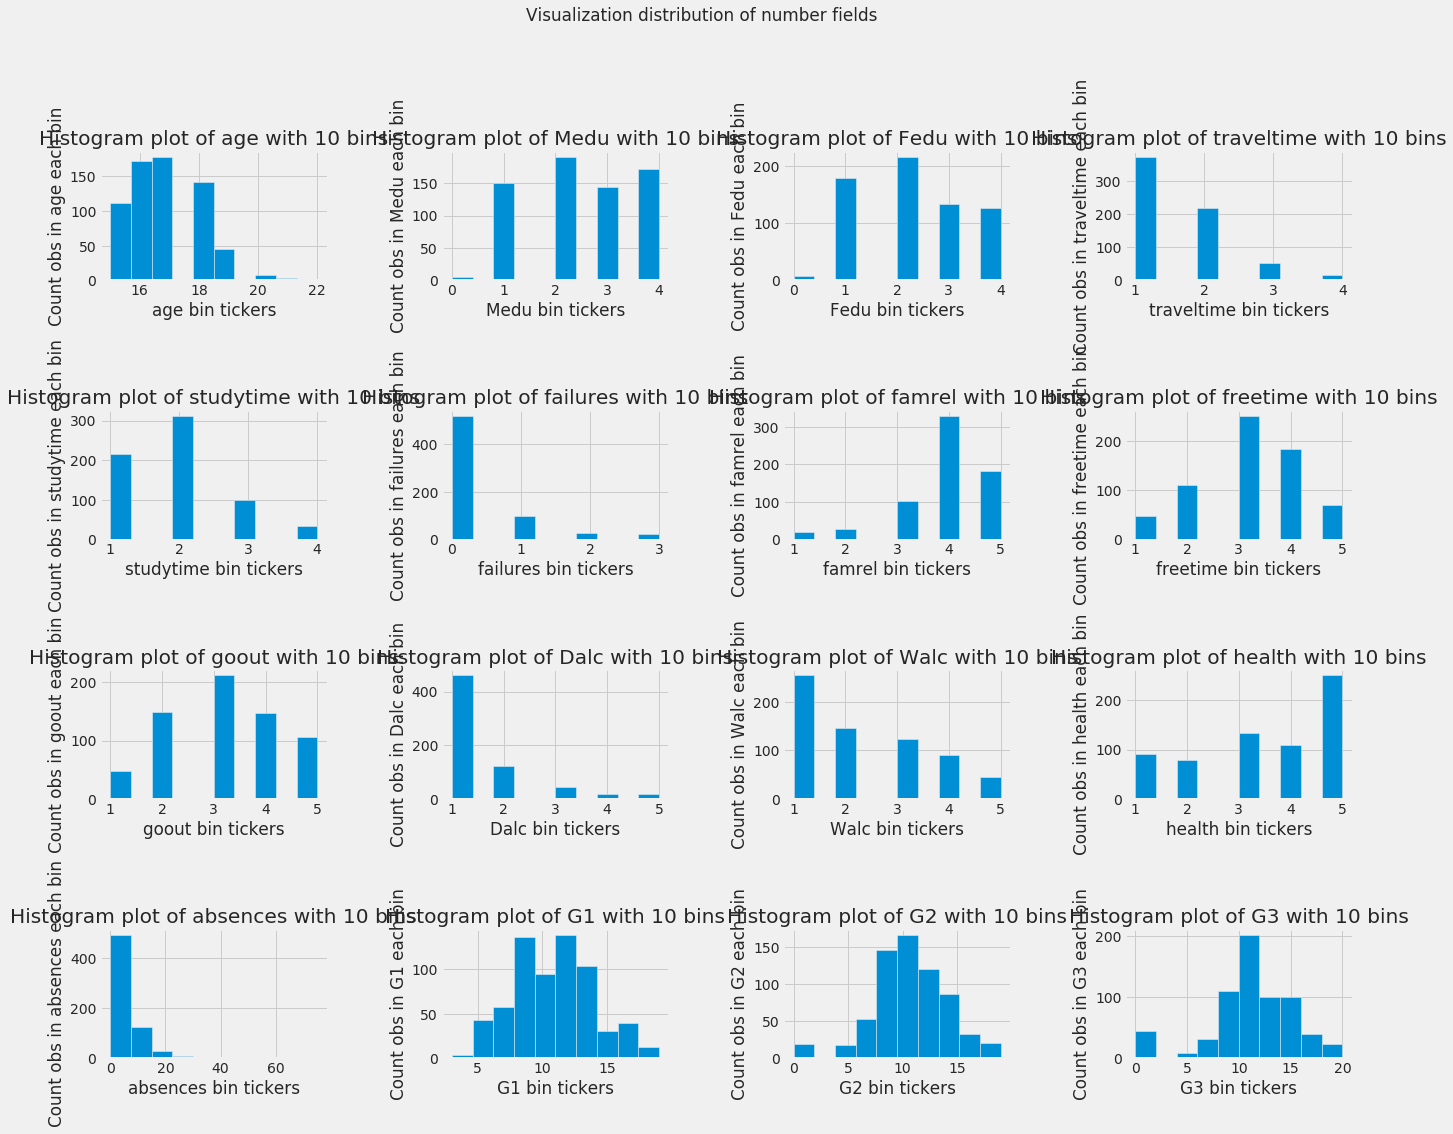

In [213]:
# khoi tao figure cho do thi 
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=1.0, wspace=0.5)
for i, column in enumerate(columns_num):  
    ax_i = fig.add_subplot(5, 4, i+1)
    ax_i = _plot_histogram(df[column], column )
plt.suptitle("Visualization distribution of number fields ")
plt.show()

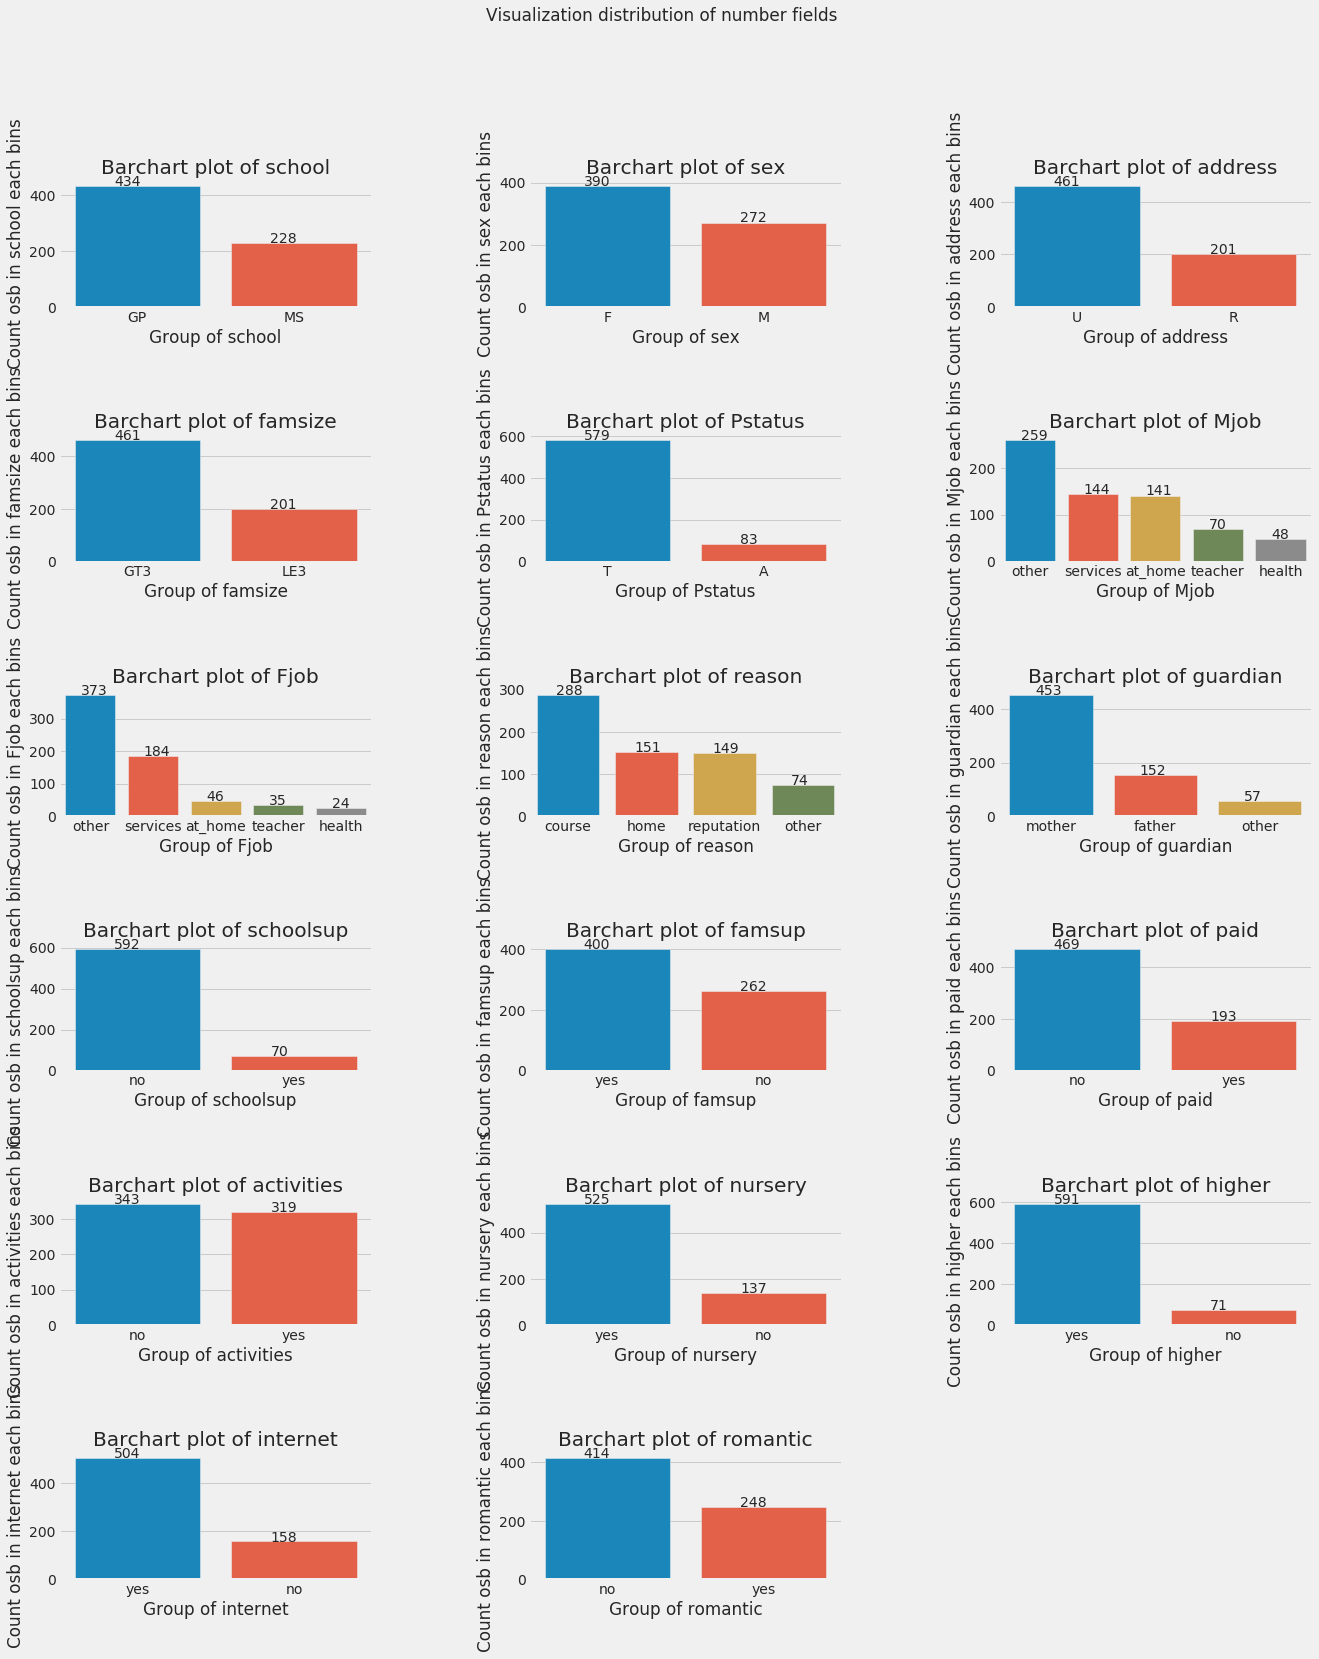

In [214]:
# khoi tao figure cho do thi 
fig = plt.figure(figsize=(20, 24))
fig.subplots_adjust(hspace=1.0, wspace=0.5)
for i, column in enumerate(columns_object):  
    ax_i = fig.add_subplot(6, 3, i+1)
    ax_i = _plot_barchart(df[column], column )
plt.suptitle("Visualization distribution of number fields ")
plt.show()

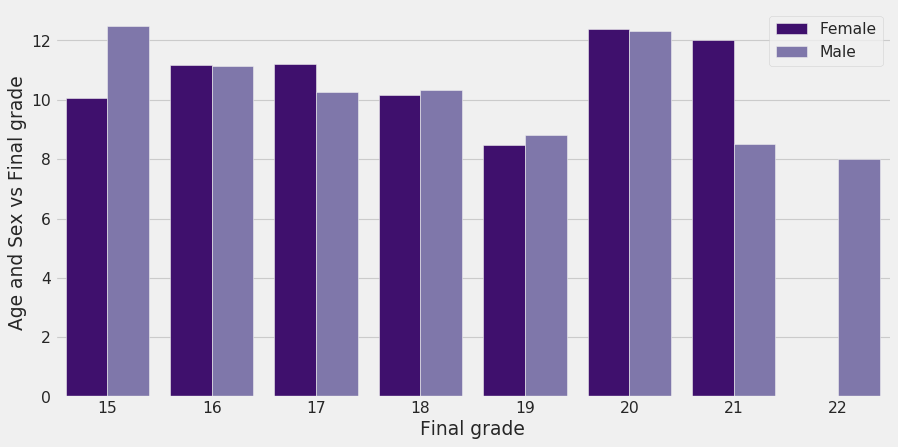

In [215]:
# Let check how sex and age affects the student's grade 

# defining matplotlib figure 
plt.figure(figsize=(12, 6), dpi=80)

color = plt.cm.Purples_r(np.linspace(0, 1,  4))

ax = sns.barplot(x="age", y="G3", data=df, hue="sex", ci=None, palette=color)

# removing the spines from the plot 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# setting x and y labels 
ax.set_xlabel("Final grade")
ax.set_ylabel('Age and Sex vs Final grade')

# renaming the default legend
plt.legend(labels=("Female", "Male"), loc=1)
plt.savefig('age_and_sex.png')

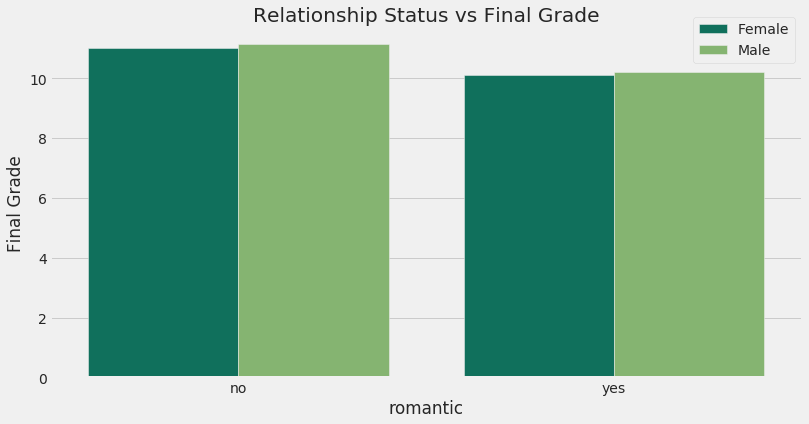

In [216]:
# Can student relationship status affects his/her grade 

fig, ax = plt.subplots(figsize=(12, 6))
pl = sns.barplot("romantic",  "G3", data=df, hue='sex', ci=None, palette=plt.cm.summer(np.linspace(0, 1, 3)))

ax.set_title("Relationship Status vs Final Grade")
ax.set_ylabel("Final Grade")
ax.legend(labels=("Female", "Male"), bbox_to_anchor=(0.1, 1.05, 0.9, 0))
plt.savefig("relationship.png")

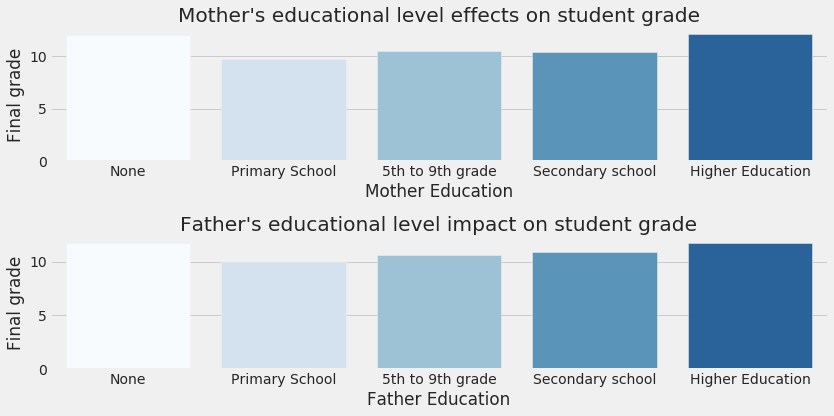

In [217]:
# Is there any impact parental eductional level have on students performance

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.barplot("Medu", "G3", data=df, ci=None, palette=plt.cm.Blues(np.linspace(0, 1, 6)), ax=ax1)
sns.barplot("Fedu", "G3", data=df, ci=None, palette=plt.cm.Blues(np.linspace(0, 1, 6)), ax=ax2)


x_labels = ["None", "Primary School", '5th to 9th grade', "Secondary school", "Higher Education"]

ax1.set_title("Mother's educational level effects on student grade")
ax1.set_ylabel("Final grade")
ax1.set_xlabel("Mother Education")
ax1.set_xticklabels(x_labels)

ax2.set_title("Father's educational level impact on student grade")
ax2.set_xlabel("Father Education")
ax2.set_ylabel("Final grade")
ax2.set_xticklabels(x_labels)

plt.tight_layout()
plt.savefig("parent.png")

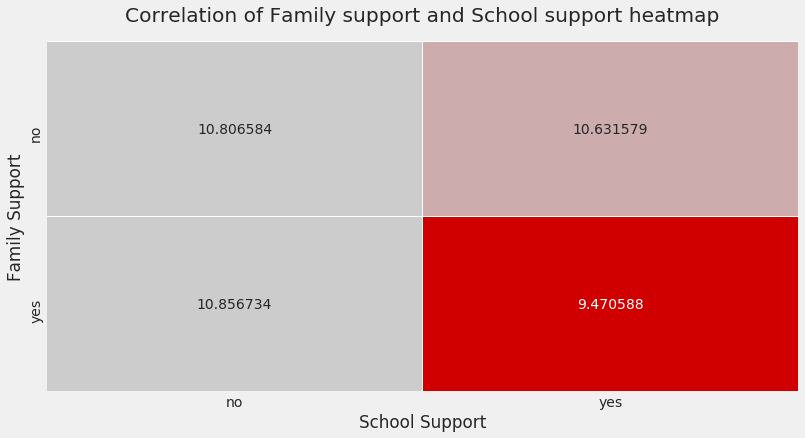

In [218]:
# How does financial needs of a student affects his/her grade 

plt.figure(figsize=(12, 6))

sup_corr =  pd.pivot_table(df, values="G3", index="famsup", columns="schoolsup", aggfunc="mean")

# plot a headmap 
ax =  sns.heatmap(sup_corr, 
                 annot=True, 
                 center=0, 
                 cbar=False, 
                 cmap="nipy_spectral", 
                 fmt='f', 
                 linewidths=0.5)

plt.title("Correlation of Family support and School support heatmap", pad=20)

# add axis labels
ax.set_xlabel("School Support")
ax.set_ylabel("Family Support")
plt.savefig("family.png")

### Data Preprocessing and Feature Engineering

In [219]:
df.shape

(662, 33)

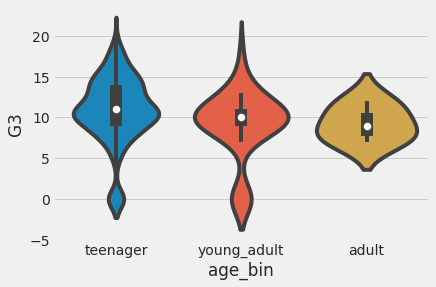

In [220]:
# We will create "age_bin" feature by grouping the age into "teenager",
# "young_adult", "adult"

# break the age into categoryies according to a given range 
df['age_bin'] = pd.cut(x=df["age"], bins=[-np.inf, 18, 20, np.inf], labels=['teenager', 'young_adult', 'adult'])

# lets visualization the effect of the categorized age on the target variable
sns.violinplot('age_bin', 'G3', data=df)
plt.savefig('age.png')

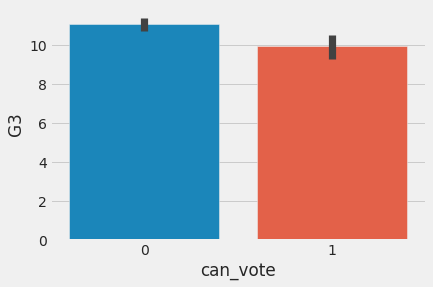

In [221]:
# We will create "vote_age" a binary feature showing wheather student is eligible to vote or not 
# We will create "is_teenager" feature. The binary feature shows either student is a teenager or not 

# Create a binary feature making true for those greater or equal to >=18 and false the other 

df["can_vote"] = (df['age'] >= 18).astype(int)

sns.barplot('can_vote', 'G3', data=df)

# you are teenager if your age is less than or equal to 19 
df["is_teenager"] = (df["age"]<=19).astype(int)
plt.savefig('age2.png')

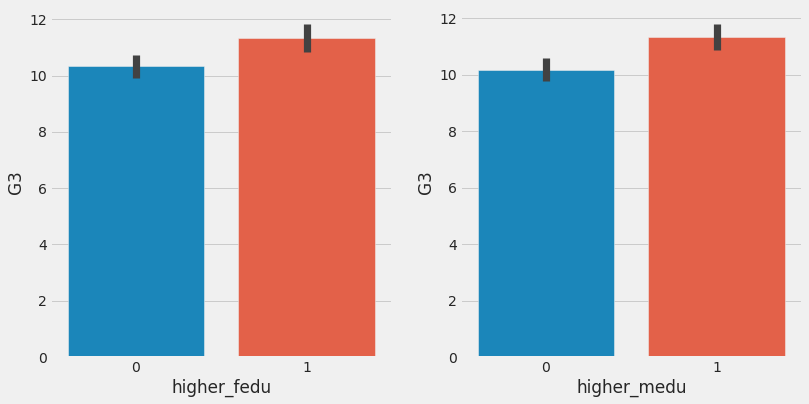

In [222]:
# Medu and Fedu feature 
# numeric 0 - None 
#         1 -  primary education (4th grade)
#         2 -  5th to 9th grade
#         3 -  secondary education
#         4 -  higher education 

# create the two feature 
df['higher_fedu'] = (df['Fedu'] > 2).astype(int)
df["higher_medu"] = (df["Medu"] > 2).astype(int)

# Let visualize the two newly created feature against the target variable
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot('higher_fedu', "G3", data=df, ax=ax[0])
sns.barplot('higher_medu', 'G3', data=df, ax=ax[1])

plt.savefig('medu.png', bbox_inches='tight')


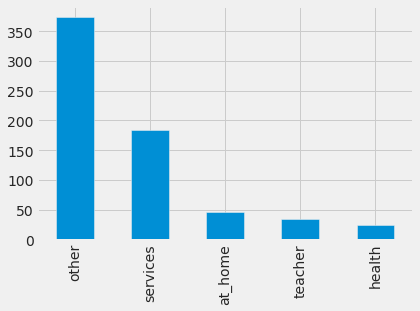

In [223]:
# Fjob and Mjob feature 

# Create the Fjob_cat feature combining the "at_home", "teacher", "health"  into one category
# We will leave the Mjob as-is

df['Fjob'].value_counts().plot(kind='bar')

In [224]:
# use  lambda expression to create category  of three 'other', 'services' and 'employee'
df['Fjob_cat'] = df["Fjob"].map({"other": "other", "services":"services", "at_home":"employee", "teacher": "employee", "health":"employee"})
df["Fjob_cat"]

0      employee
1         other
2         other
3      services
4         other
         ...   
610    employee
611       other
618       other
632       other
642       other
Name: Fjob_cat, Length: 662, dtype: object

In [225]:
#df["Fjob_cat"]= df["Fjob"].apply(lambda x:x if (x=='other' or x == "services") else 'employee')


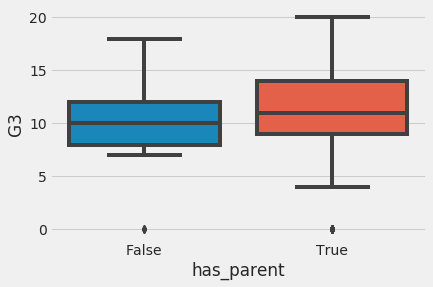

In [226]:
# guardian feature 
# we will create "has_parent": a boolean feature of student having or not having a parent

# create their feature
df["has_parent"] = df["guardian"].apply(lambda x: True if (x=="mother" or x == "father") else False)

# plot 
sns.boxplot("has_parent", "G3", data=df)
plt.savefig("guardian.png", bbox_inches='tight')

In [227]:
# absence feature 
# We will  discretization to form a new feature named "absent_cat"

# create categories of absence
df["absent_cat"] = pd.cut(x=df["absences"], bins=[-np.inf, 0, 5, 10, np.inf], 
                         labels=["no_abs", "low", "moderate", "hight"], right=True)

df["absented"] = (df["absences"]>0).astype(int)

#### Label encoding Ordinal-Categorical variables

- Label Encoding is a popular encoding technique for handing categorical variables. In this technique, each label is assigned a unique integer on alphabetical ordering 

In [228]:
# list of feature to label encode 

label_encode_feats = ['famsize', 'studytime', 'traveltime', 'freetime', 'age_bin', 'absent_cat']

# initialize label encoder
le = LabelEncoder()

for label in label_encode_feats:
    df[label] = le.fit_transform(df[label])

#### One-hot-encoding of non-ordinal category 

- Encode categorical feature as a one-hot numeric array 

In [229]:
# select categorical non-ordinal features to one-hot-encode 

def select_label(label): 
    return label not in (label_encode_feats + ['absences', "age", "G1", "G2", "G3"])

# return selected features 
filtered = [i for i in filter(select_label, df.columns.tolist())]

# function to transform data into one-hot-encodings
def get_hot_encode(df): 
    encoder_list = list()
    
    for label in filtered: 
        encoder_list.append(pd.get_dummies(df[label], prefix=label, drop_first=True))
        
        return encoder_list
    
# initialize and transform the dataset with the function 
hot_encoded = get_hot_encode(df)

df = pd.concat([df, *hot_encoded], axis=1).drop(filtered, axis=1)

### Continuous Variables 

#### Handing skewness and outliers in countinous variables



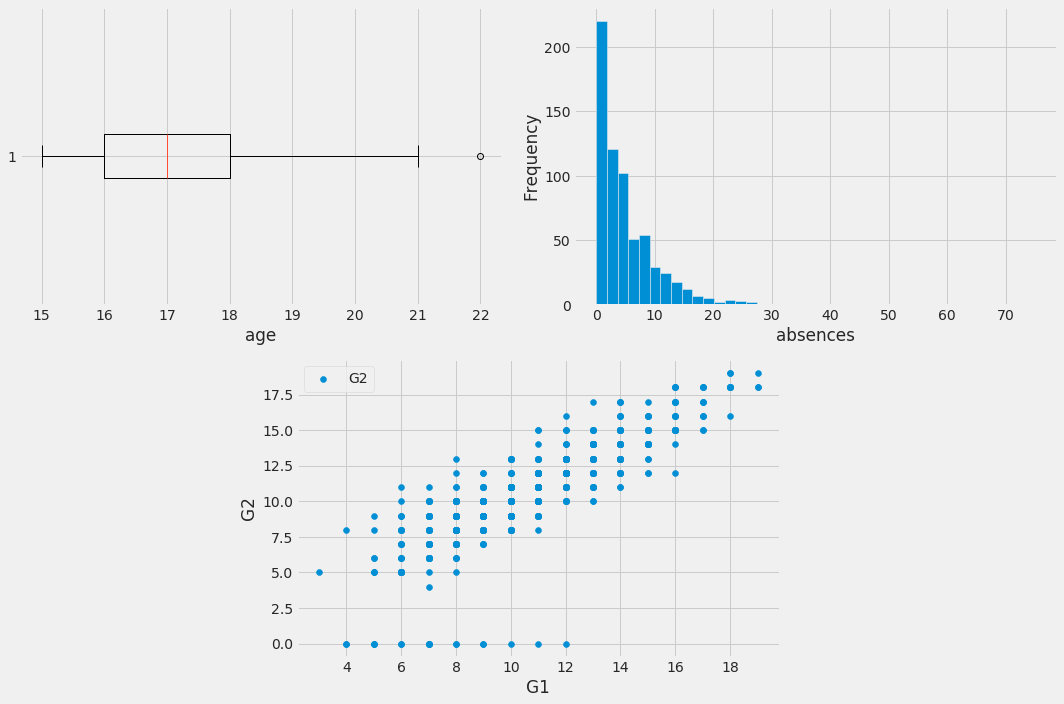

In [230]:
# user gridspec to parition the figure into subplots 
plt.figure(figsize=(15, 10))
gspec = gridspec.GridSpec(4, 4)

# defining the axes 
top_left = plt.subplot(gspec[:2, :2])
top_right = plt.subplot(gspec[:2, 2:])
lower_middle = plt.subplot(gspec[2:, 1:3])

# plot maps  
top_left.boxplot(df["age"], vert=False)
top_left.set_xlabel("age")

top_right.hist(df["absences"], bins='auto')
top_right.set_xlabel("absences")
top_right.set_ylabel("Frequency")

lower_middle.scatter("G1", "G2", data=df)
lower_middle.set_xlabel("G1")
lower_middle.set_ylabel("G2")

plt.legend(loc="best")
plt.tight_layout()
plt.savefig("skweness.png", bbox_inches='tight')

### Checing for Multicollinearity 

In [201]:
df.values

array([[18,  0,  1, ...,  1,  2,  0],
       [17,  0,  0, ...,  1,  1,  0],
       [15,  1,  0, ...,  1,  2,  0],
       ...,
       [18,  1,  2, ...,  1,  3,  1],
       [19,  0,  1, ...,  2,  1,  1],
       [17,  0,  1, ...,  1,  3,  1]])

In [231]:
# create a dateframe 
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

vif['feature'] = df.columns

vif_filter_columns = (vif[vif['vif']>=10].feature.values).tolist()

df = df.drop(vif_filter_columns,axis=1)

# get the copy of preprocessed dataframe
pred_df = df.copy()


In [233]:
pred_df.to_csv("data/pred_df.csv", index=False)

In [234]:
pred_df

famsize  traveltime  studytime  freetime  absences  absent_cat  school_MS
0          0           1          1         2         6           2          0
1          0           0          1         2         4           1          0
2          1           0          1         2        10           2          0
3          0           0          2         1         2           1          0
4          0           0          1         2         4           1          0
..       ...         ...        ...       ...       ...         ...        ...
610        0           1          1         4         0           3          1
611        0           1          2         1         5           1          1
618        1           2          1         2         0           3          1
632        0           1          1         2         4           1          1
642        0           1          1         4         0           3          1

[662 rows x 7 columns]

### Model Creation

In [ ]:
# drop the target variable
X = prep_df.drop('G3',axis=1)

# get target
y = prep_df['G3']

# calling the splitting function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [ ]:
# initialize the function
scaler = StandardScaler()

# apply the transformation
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Check shapes
print('X_train shape = {} and y_train shape = {}'.format(X_train.shape,y_train.shape))
print('X_test shape = {} and y_test shape = {}'.format(X_test.shape,y_test.shape))

# initialize
regression = LinearRegression()

# fit to data
lin_reg = regression.fit(X_train,y_train)

# generate prediction
prediction = lin_reg.predict(X_test)

# use the DummyRegressor as baseline in comparism to the real regressor
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('\n\n Dummy train score ',lm_dummy_mean.score(X_train,y_train))
print(' Dummy test score ',lm_dummy_mean.score(X_test,y_test))

print('\n\ntrain score ',lin_reg.score(X_train,y_train))
print('test score ',lin_reg.score(X_test,y_test))

len(lin_reg.coef_)
X.columns.tolist()
fig,ax = plt.subplots(figsize=(14,6))
sns.barplot(X.columns.tolist(),lin_reg.coef_)
plt.xticks(rotation=90)
plt.ylabel('Feature Coefficient')
plt.xlabel('Feature names')
# plt.savefig('feature_imp.png')
plt.savefig('feature_imp.png',bbox_inches='tight')
